Before I discovered Data Science, I was investing blindly. Without any specific metrics to go by, I put my money into a mixture of really good and really bad companies. Out of all these companies, PSEC was my favorite for a few reasons. First, it paid a monthly dividend to its shareholders. Secondly, the price of the stock when I discovered it was quite low. In my eyes, I saw an opportunity for passive income. The plan was to buy up as much of PSEC as I could and reap the dividend reward. But was that such a wise decision? Today, we are going to find out. This Exploratory Data Analysis (EDA) of PSEC will serve to answer the following questions:

1. What level of risk is associated with investing in PSEC, and how does that compare to the potential returns?

2. Is the risk-return trade-off attractive for different types of investors?

3. How has the performance of PSEC changed over time? Are there identifiable trends or patterns in the returns?

4. What is the distribution of returns for PSEC? Are there any skewness or kurtosis that investors should be aware of?

I believe that answering these questions will allow me to determine how good or bad an investment PSEC was.

But before the EDA, what is PSEC?

Prospect Capital Corporation is a business development company. It specializes in middle market, mature, mezzanine finance, later stage, emerging growth, leveraged buyouts, refinancing, acquisitions, recapitalizations, turnaround, growth capital, development, capital expenditures, and subordinated debt tranches of collateralized loan obligations, cash flow term loans, and bridge transactions. It also makes real estate investments, particularly in the multi-family residential real estate asset class.

To begin, we will import the necessary packages for analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm
import seaborn as sns

Next, we are going to download the Open-High-Low-Close (OHLC) data for PSEC and save it as a CSV file. This way, we won't need to download the dataset every time we wish to access it.

In [2]:
tickerSymbol = 'PSEC'

tickerData = yf.Ticker(tickerSymbol)

tickerDf = tickerData.history(period='1d', start='2019-1-1', end='2023-1-1')

tickerDf.to_csv('PSEC.csv')




Now that we have the CSV ready, let's take a look.

In [3]:
df = pd.read_csv('PSEC.csv')

df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-01-02 00:00:00-05:00,3.921301,4.014814,3.896364,3.964941,1693000,0.0,0.0
1,2019-01-03 00:00:00-05:00,3.940003,3.977408,3.908832,3.908832,2236200,0.0,0.0
2,2019-01-04 00:00:00-05:00,3.940004,4.008580,3.921302,3.989878,3184800,0.0,0.0
3,2019-01-07 00:00:00-05:00,3.996111,4.127029,3.964941,4.083390,3178500,0.0,0.0
4,2019-01-08 00:00:00-05:00,4.083390,4.170668,4.070921,4.164434,3047600,0.0,0.0


Let's examine the data types to ensure that the columns are in their correct data types.

In [4]:
print(df.dtypes)

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object


We have a minor issue concerning the date. Its data type is currently classified as an object. We need to alter this in order to conduct a proper analysis of the data. We will change the data type of the date column to datetime and set it as the index.

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02 00:00:00-05:00,3.921301,4.014814,3.896364,3.964941,1693000,0.0,0.0
2019-01-03 00:00:00-05:00,3.940003,3.977408,3.908832,3.908832,2236200,0.0,0.0
2019-01-04 00:00:00-05:00,3.940004,4.008580,3.921302,3.989878,3184800,0.0,0.0
2019-01-07 00:00:00-05:00,3.996111,4.127029,3.964941,4.083390,3178500,0.0,0.0
2019-01-08 00:00:00-05:00,4.083390,4.170668,4.070921,4.164434,3047600,0.0,0.0


Now that the dataframe has been processed, let's take a look at the stock price over time.

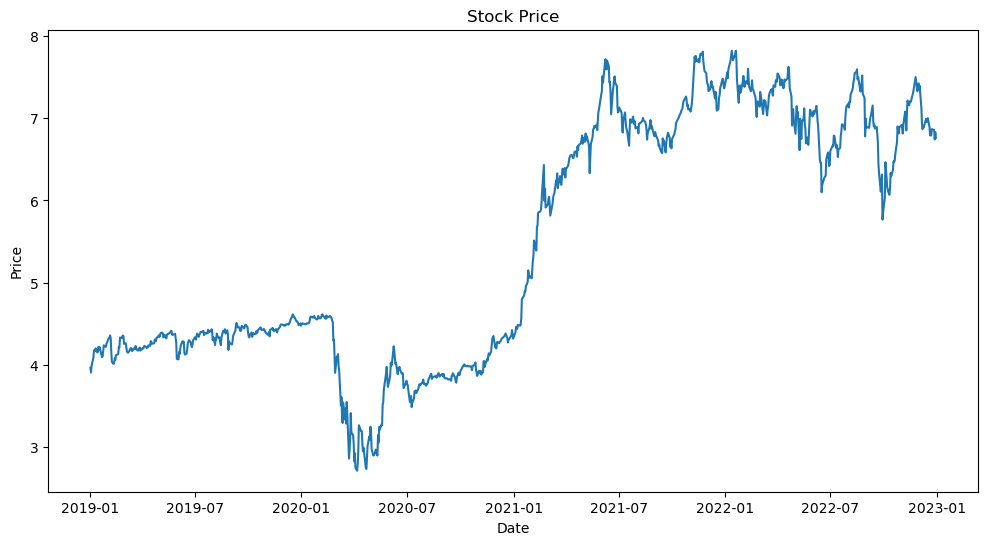

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title('Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

The price of PSEC over time shows a sharp decline during the pandemic, followed by a sharp increase in price around July 2020. To be honest, the entire market experienced this sharp increase. I personally believe the surge in price occurred due to new retail traders entering the market. There was most likely a significant influx of cash into the market as a whole.

Next, we are going to compute and graph some metrics that we can use to gain further insight into PSEC as an investment. The metrics computed are the following:

Annual return
Annual volatility
Total return
Average daily return
Daily return volatility
Sharpe ratio
Skewness
Kurtosis

First up, let's take a look at the returns. We are going to calculate Daily log returns, Total return, Annualized returns, and average daily returns

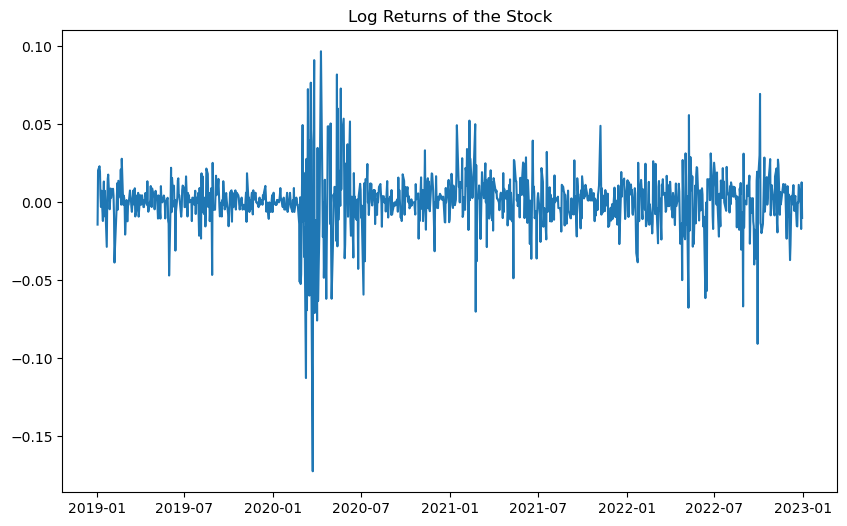

Annual return:  9.09%
Total Return: 41.60%
Average Daily Return:  0.05299%
Sharpe Ratio: 4.7630


In [7]:
df['Returns'] = np.log(df['Close'] / df['Close'].shift(1))

#Total Return Cal
cumulative_returns = (1 + df['Returns']).cumprod() - 1
total_return = cumulative_returns[-1]

#Annualized Returns using geometric mean
psec_daily_growth = 1 + df['Returns']
geo_mean = np.prod(psec_daily_growth)**(1/len(psec_daily_growth))
psec_annual_ret = (geo_mean**252 - 1)*100

#Average Daily Returns
mean_return = df['Returns'].mean() * 100

#Annual Vol
psec_annual_vol = (df['Returns'].std() * np.sqrt(252)) * 100


#Sharpe Ratio
sharpe_ratio = ((psec_annual_ret / 100) / (psec_annual_vol / 100)) * np.sqrt(252)  # Assuming 252 trading days in a year


plt.figure(figsize=(10,6))
plt.plot(df.index, df['Returns'])
plt.title('Log Returns of the Stock')
plt.show()


print(f'Annual return: {psec_annual_ret: .2f}%')
print(f"Total Return: {total_return:.2%}")
print(f'Average Daily Return: {mean_return: .4}%')
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

We can infer a few things from the information above:

If you had invested money into PSEC during this timeframe, you would have seen a 9.09% return on your investment.

With an investment in PSEC, you would have experienced a total return of 41.60 percent on your investment during this timeframe.

The average daily return of 0.05299% suggests that PSEC returns can vary quite a bit.

The high Sharpe ratio calculated may be due to PSEC's super rally in the dataset. From about July 2020 to July 2021, PSEC experienced a huge rally in price.

Graphing the returns of PSEC can give us an idea of its volatility as an investment. As mentioned before, PSEC only experienced extreme volatility during the pandemic, which explains the sharpness in the graph above around that time.

Next, we'll address volatility. We are going to look at a 21-day volatility chart, along with annual volatility, and daily return volatility.

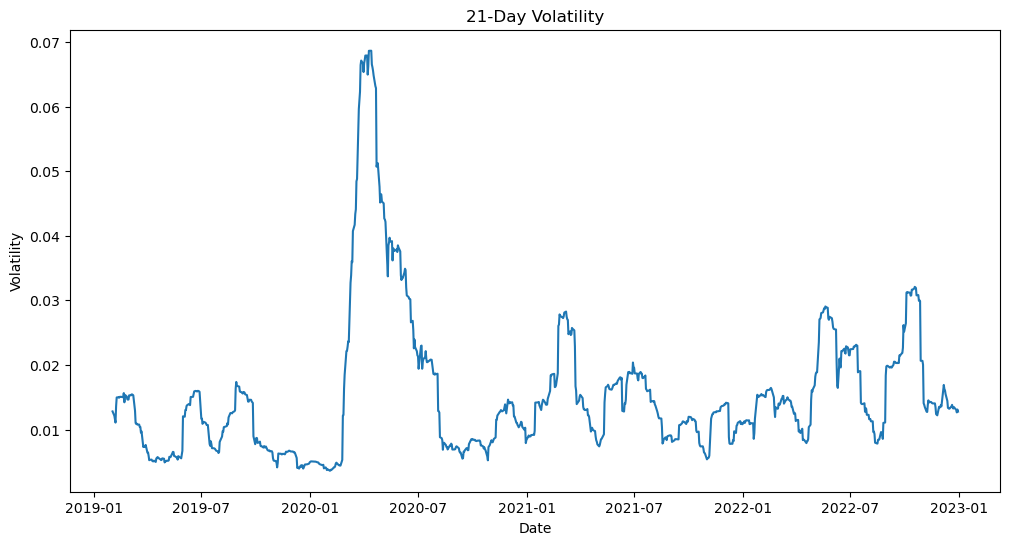

Annual volatility:  30.28%
Daily Return Volatility: 1.9076%


In [8]:
df['21D_Volatility'] = df['Returns'].rolling(window=21).std()

vol = df['Returns'].std() * 100

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['21D_Volatility'])
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('21-Day Volatility')
plt.show()

print(f"Annual volatility: {psec_annual_vol: .2f}%")
print(f"Daily Return Volatility: {vol:.4f}%")

From the above, I can infer the following:

The annual volatility is a bit inflated. I feel like this occurred due to the pandemic. Before and after that event, PSEC seems to maintain lower volatility.

The average daily return of 0.04947% suggests that PSEC returns can vary quite a bit.

The 21-day volatility gives us an estimate of PSEC's monthly volatility. Other than the huge peak around the pandemic, PSEC's volatility seems to be pretty stable. However, it appears that PSEC is sensitive to price changes, as indicated by the many peaks present in the graph.

Next, we will take a look at the daily returns on a histogram. The histogram will give us an idea of how the returns are distributed. Will it be symmetric or skewed? Is there a normal distribution or are noticeable fat tails present?

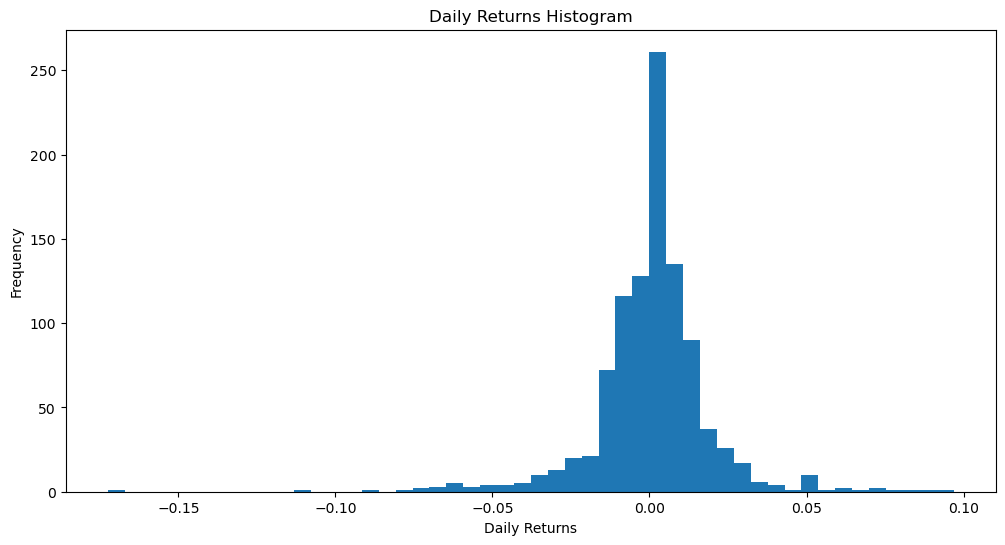

Skewness: -0.9819242103417356
Kurtosis: 11.658182748477655


In [9]:
skewness = df['Returns'].skew()
kurtosis = df['Returns'].kurtosis()

plt.figure(figsize=(12, 6))
plt.hist(df['Returns'].dropna(), bins=50)
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.title('Daily Returns Histogram')
plt.show()

print(f'Skewness: {skewness}')
print(f'Kurtosis: {kurtosis}')

From the above, we can infer the following:

A negative skewness means that the distribution of returns is skewed to the left. This suggests a higher probability of large negative returns compared to positive ones.

The number produced for kurtosis indicates that the returns have fat tails and may be sensitive to extreme positive and negative movements.

PSEC's daily returns seem to be skewed to the left. It resembles a normal distribution but there are fatter tails present on the left.

Next, we are going to examine the autocorrelation of the log returns. We want to know whether or not the dataset uses past values to predict future values. This cannot happen if you are assuming an efficient market. No autocorrelation means that there is randomness present in the dataset.

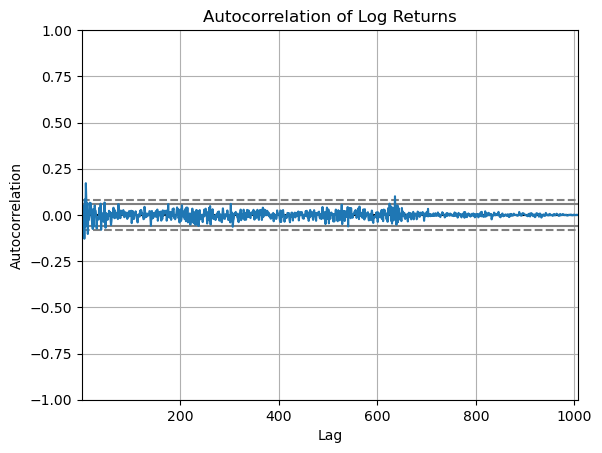

In [10]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['Returns'].dropna())
plt.title('Autocorrelation of Log Returns')
plt.show()

The chart above does not show any correlation between past returns and future returns.

Next, we will consider the Intra-Day Range. We are using the intra-day range as a measure of volatility. It is calculated by subtracting the low price of the day from the high price. A large range may suggest greater risk, while a smaller range might suggest stability in returns.

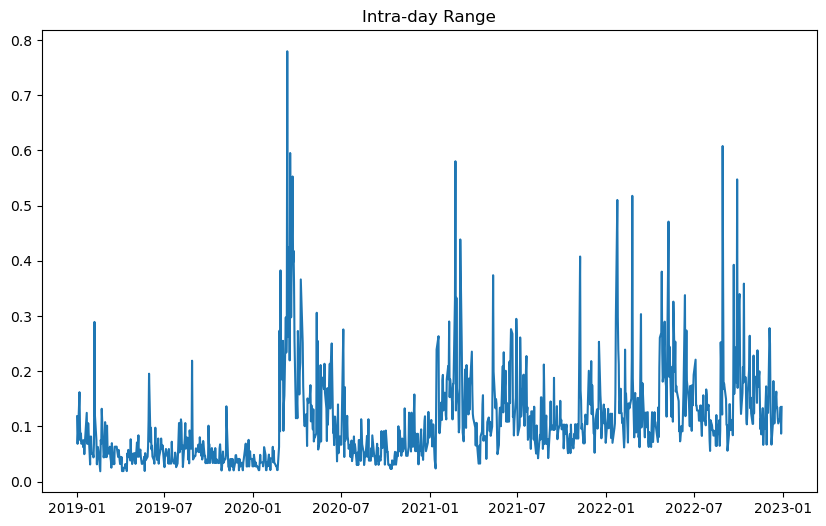

In [11]:
df['IntraDay_Range'] = df['High'] - df['Low']

plt.figure(figsize=(10,6))
plt.plot(df.index, df['IntraDay_Range'])
plt.title('Intra-day Range')
plt.show()

The graph above shows a lot of peaks over the timeframe of the dataset. This would suggest that PSEC as an investment was very volatile over this period. Again, we see the highest peak around the time of the pandemic. It also seems like the peaks are consistent.

As a fun exercise, I plotted the closing price against its 20-day and 50-day moving averages to simulate a crossover moving average in hopes that it will give us a sense of where the trend is going.

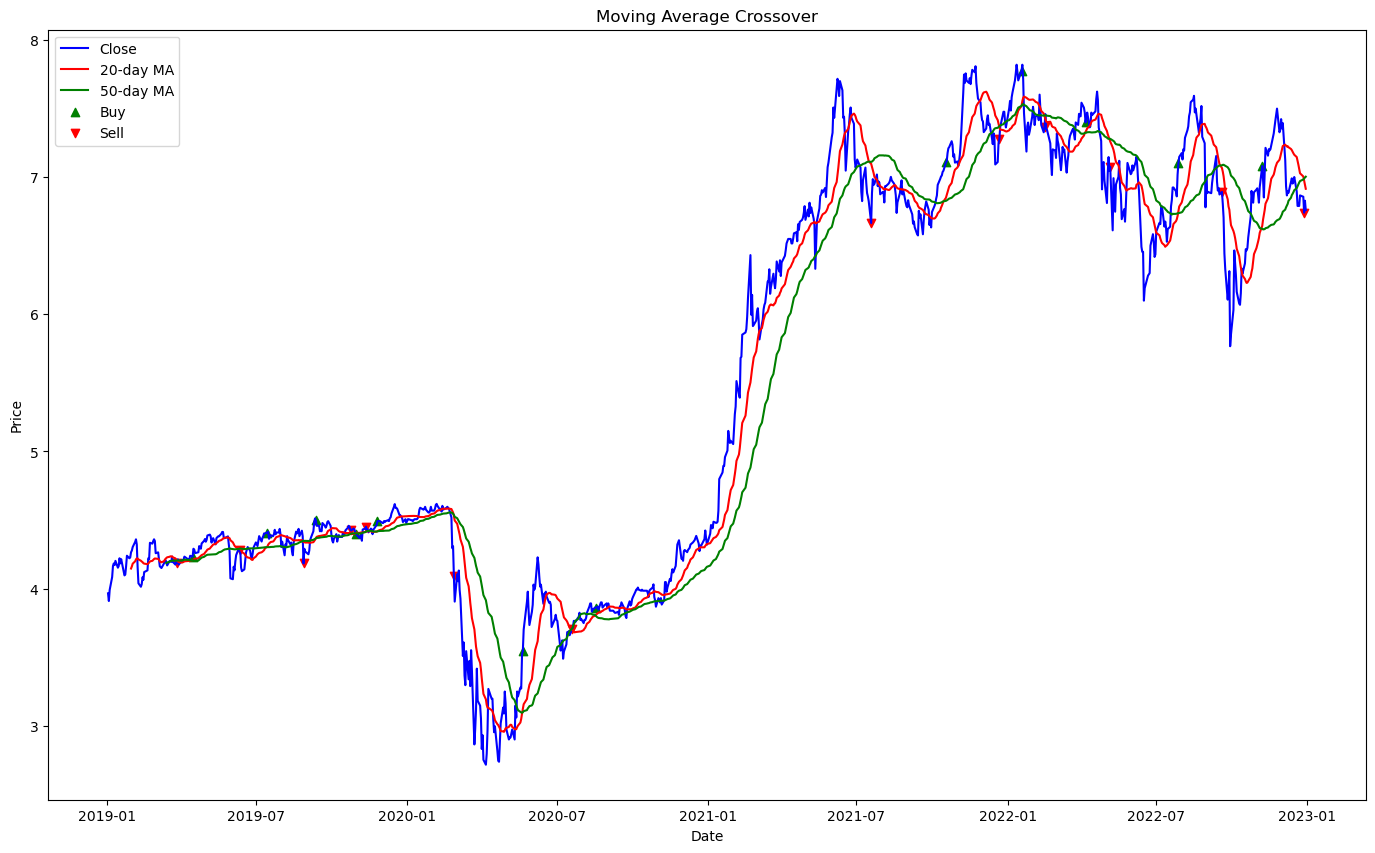

In [12]:
df['20D_MA'] = df['Close'].rolling(window=20).mean()
df['50D_MA'] = df['Close'].rolling(window=50).mean()
plt.figure(figsize=(17, 10))

plt.plot(df['Close'], color='blue', label='Close')
plt.plot(df['20D_MA'], color='red', label='20-day MA')
plt.plot(df['50D_MA'], color='green', label='50-day MA')

buy_signals = df[(df['20D_MA'].shift(1) < df['50D_MA'].shift(1)) & (df['20D_MA'] > df['50D_MA'])].index
sell_signals = df[(df['20D_MA'].shift(1) > df['50D_MA'].shift(1)) & (df['20D_MA'] < df['50D_MA'])].index

plt.scatter(buy_signals, df['Close'].loc[buy_signals], color='green', marker='^', label='Buy')
plt.scatter(sell_signals, df['Close'].loc[sell_signals], color='red', marker='v', label='Sell')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Average Crossover')
plt.legend()
plt.show()



Overall, based on the metrics and their graphs, PSEC seems like an investment that provided good returns over this time period. In order to enjoy those returns, you had to be okay with the high risk involved. I personally believe that the high risk present in this EDA is due to the pandemic. Before and after the pandemic, PSEC experienced stable volatility.

I think the next steps for this project are to:

1. Compare PSEC to other stocks in its industry.

2. Investigate how PSEC might affect the risk/return of different portfolios.

3. Use a different timeframe (perhaps one after the pandemic and after that huge rally).